The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Reading in the Nobel Prize data
nobel = pd.read_csv('data/nobel.csv')

# Taking a look at the first several winners
nobel.head(n=6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


In [3]:
nobel.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [4]:
top_gender = nobel['sex'].mode()[0]
top_country = nobel['birth_country'].mode()[0]
print(f'the most commonly awarded gender : {top_gender} , and the most commonly awarded country is : {top_country}')

the most commonly awarded gender : Male , and the most commonly awarded country is : United States of America


In [12]:
# 1. Calculating the decade with the highest ratio of US-born Nobel Prize winners
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby(['decade'], as_index=False)['usa_born_winner'].mean()

# Find the decade with the highest ratio of US-born winners
max_decade_index = prop_usa_winners['usa_born_winner'].idxmax()
max_decade_usa = prop_usa_winners.loc[max_decade_index, 'decade']
print(f'The decade with the highest ratio of US-born Nobel Prize winners is {max_decade_usa}.')

The decade with the highest ratio of US-born Nobel Prize winners is 2000.


In [11]:
nobel_for_female = nobel[nobel['sex'] == 'Female']
female_by_decades = nobel_for_female.groupby('decade')['laureate_id'].count()

# Find the maximum number of female laureates in any decade
max_female_count = female_by_decades.max()
max_female_decade = female_by_decades.idxmax()
print(f'The decade with the highest number of female Nobel laureates is {max_female_decade} with {max_female_count} laureates.')

The decade with the highest number of female Nobel laureates is 2010 with 13 laureates.


In [19]:
nobel_for_female = nobel_for_female.sort_values(by = 'year')
first_woman_name = nobel_for_female['full_name'].values[0]
first_woman_category = nobel_for_female['category'].values[0]
print(f'The first woman get Nobel prize is {first_woman_name}, in {first_woman_category} Category')

The first woman get Nobel prize is Marie Curie, née Sklodowska, in Physics Category


In [22]:
# Group by laureate_id and count occurrences
repeat_winners = nobel.groupby('laureate_id').size()

# Filter laureates who won more than once
repeat_winners = repeat_winners[repeat_winners > 1].index

# Get full names of repeat winners
repeat_list = nobel[nobel['laureate_id'].isin(repeat_winners)]['full_name'].unique()

# Print the list
print(f"Repeat winners: {list(repeat_list)}")


Repeat winners: ['Marie Curie, née Sklodowska', 'Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'John Bardeen', 'Frederick Sanger', 'K. Barry Sharpless', 'Barry Sharpless']


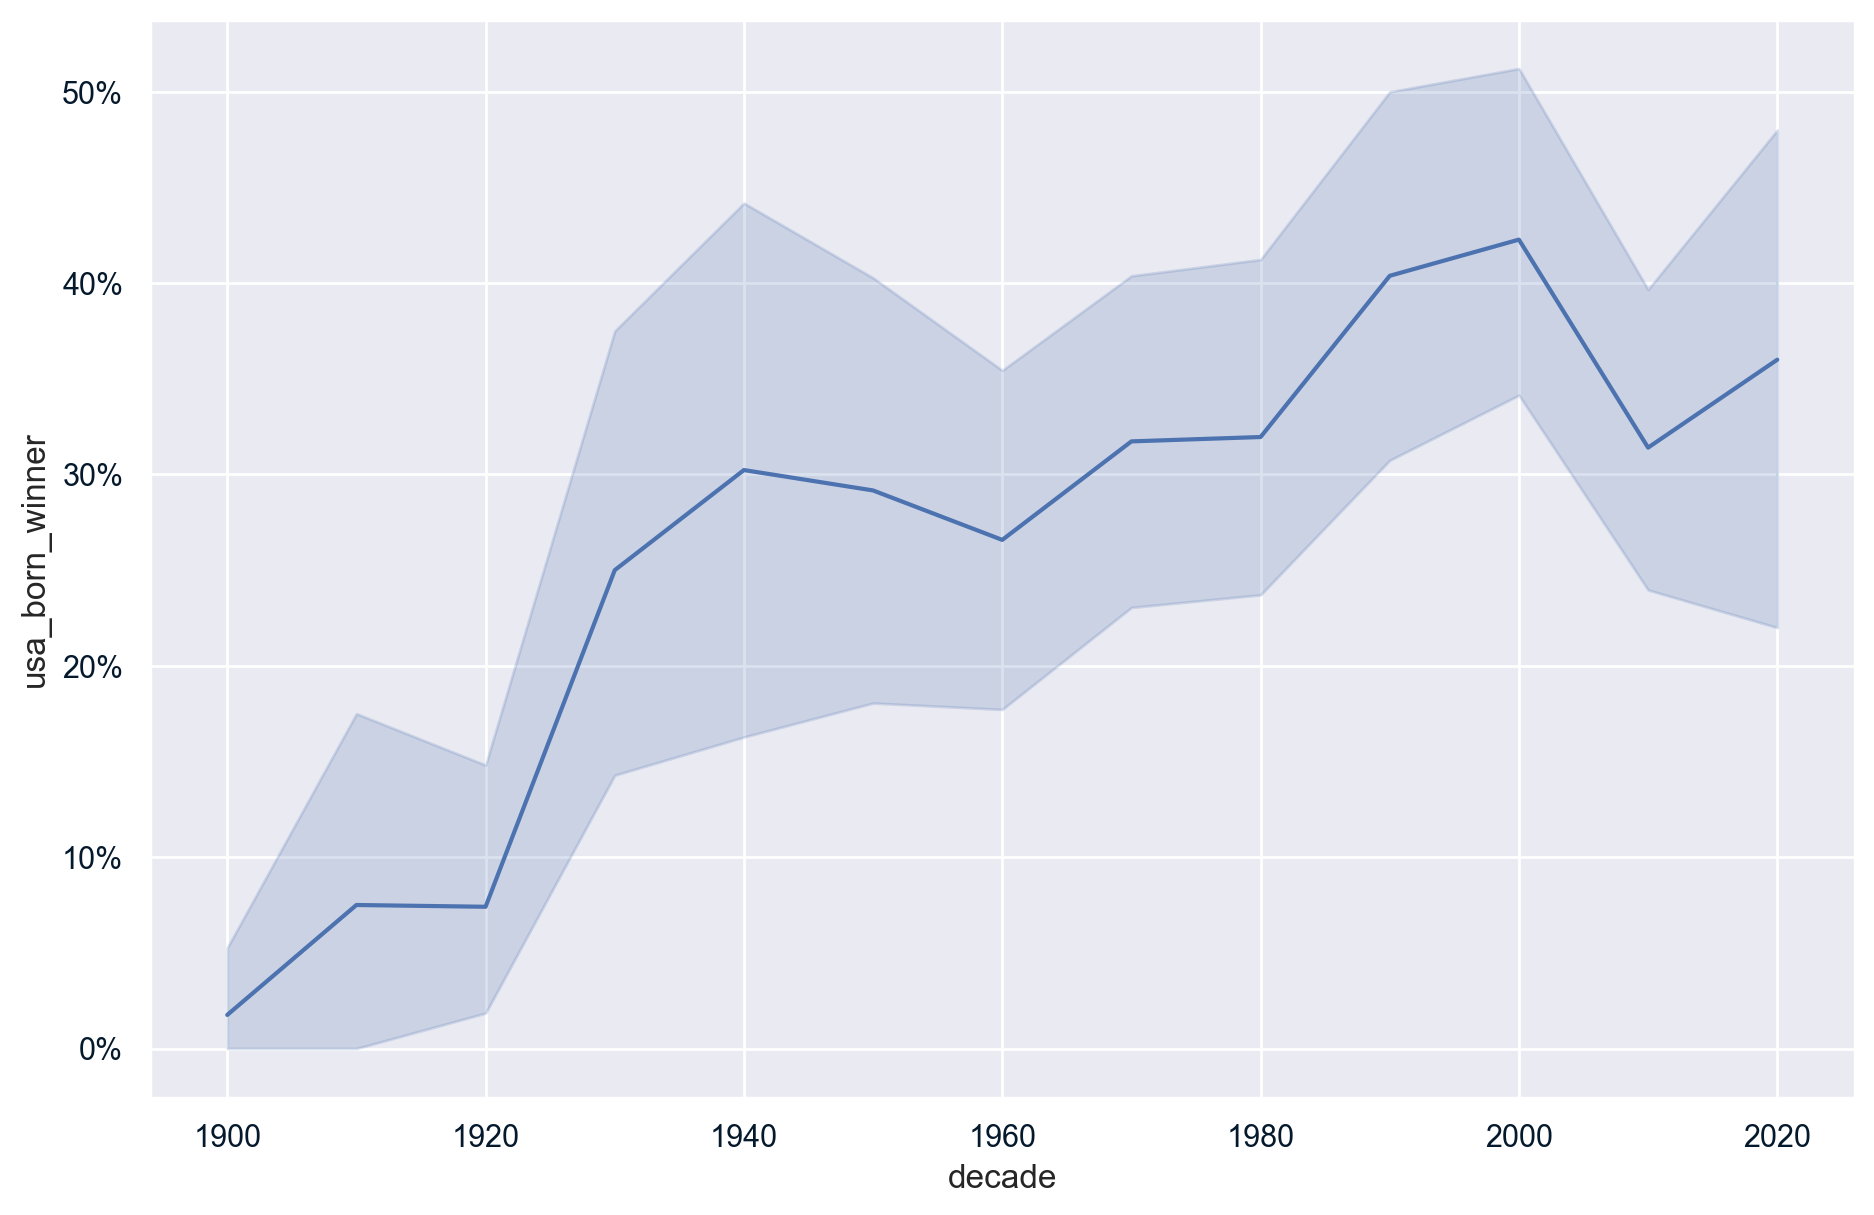

In [110]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x='decade', y='usa_born_winner', data=nobel)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

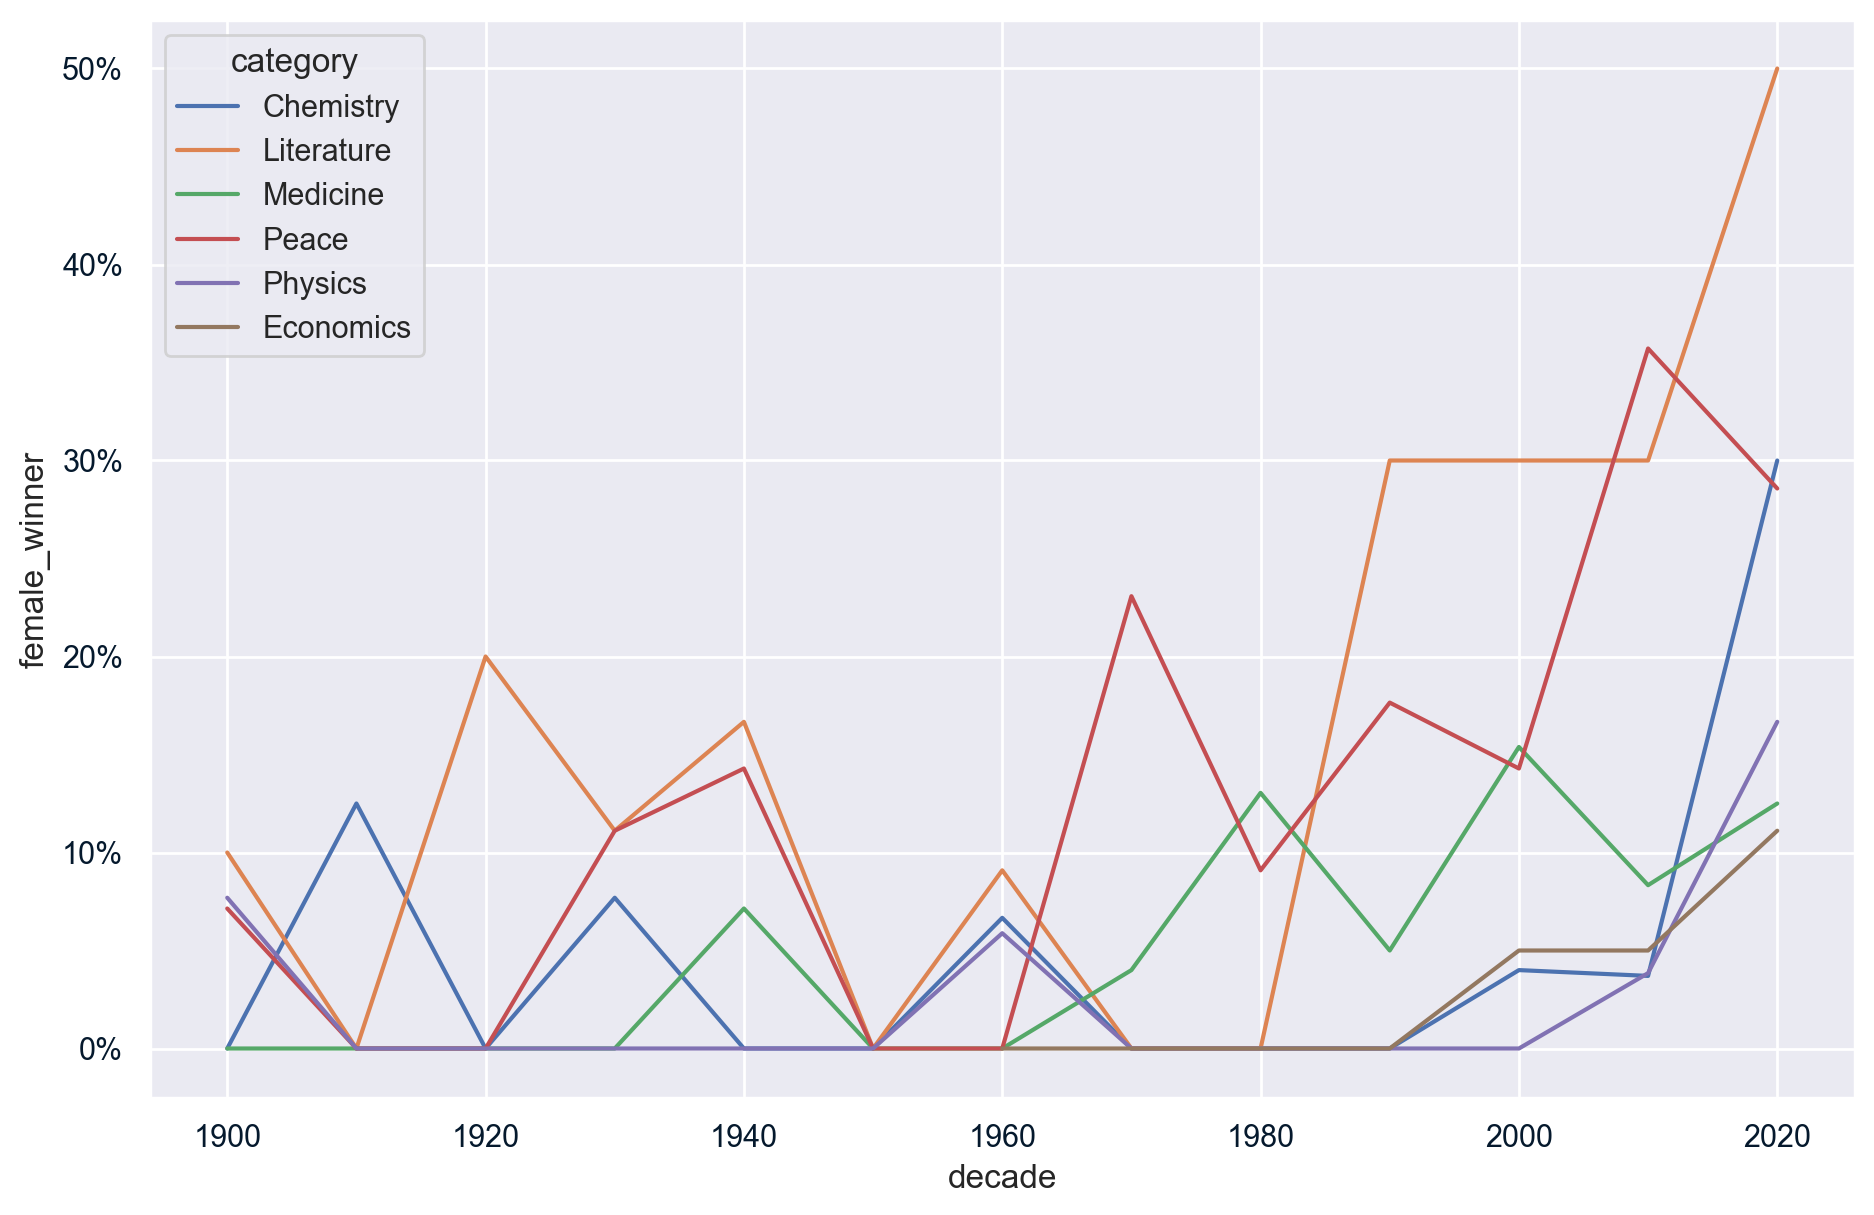

In [111]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex']=='Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
prop_female_winners
# Plotting USA born winners with % winners on the y-axis
ax = sns.lineplot(x='decade', y='female_winner', hue='category', data=prop_female_winners)

# Adding %-formatting to the y-axis
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

In [112]:
# Picking out the first woman to win a Nobel Prize
nobel[nobel['female_winner']==True].nsmallest(1,'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


In [113]:
# Selecting the laureates that have received 2 or more prizes.
nobel.groupby('full_name').filter(lambda x: len(x)>1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


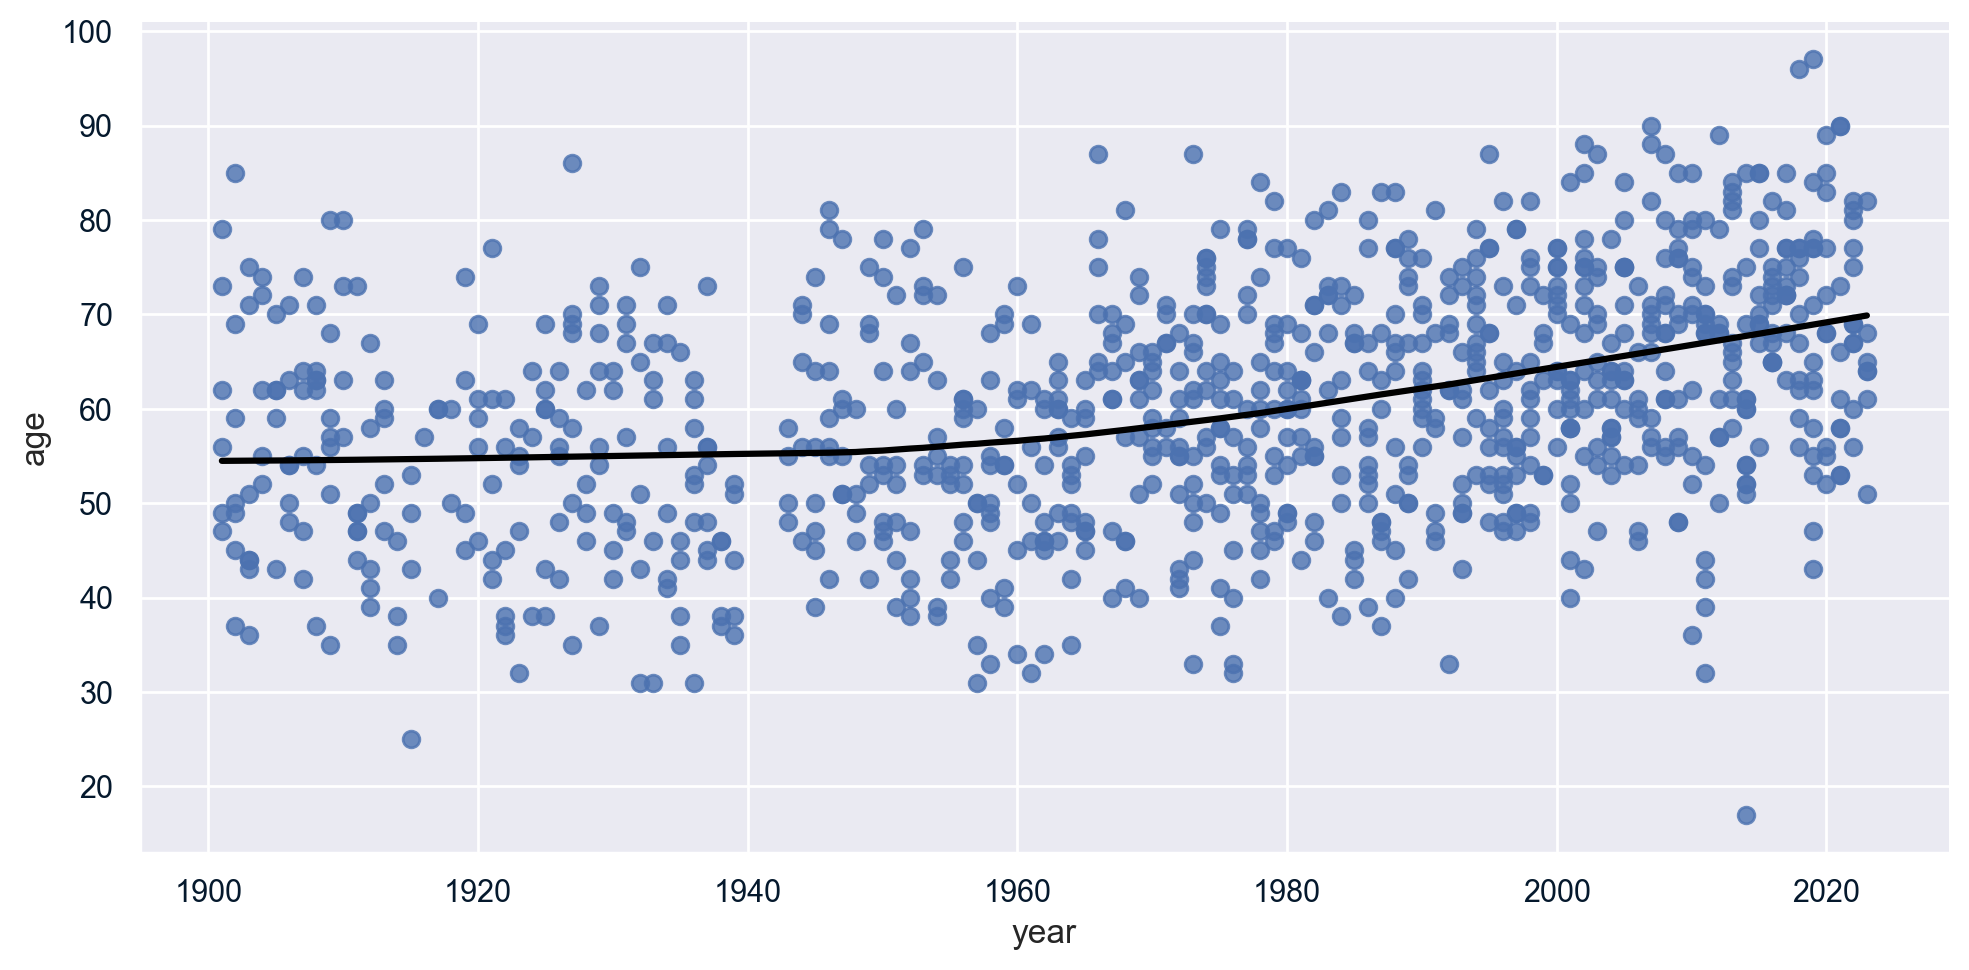

In [114]:
# Converting birth_date from String to datetime, handling invalid dates
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'], format='%Y-%m-%d', errors='coerce')

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

# Dropping rows with missing or invalid birth_date values (if necessary)
nobel = nobel.dropna(subset=['birth_date'])

# Plotting the age of Nobel Prize winners
import seaborn as sns
sns.lmplot(x='year', y='age', data=nobel, lowess=True, aspect=2, line_kws={'color': 'black'})


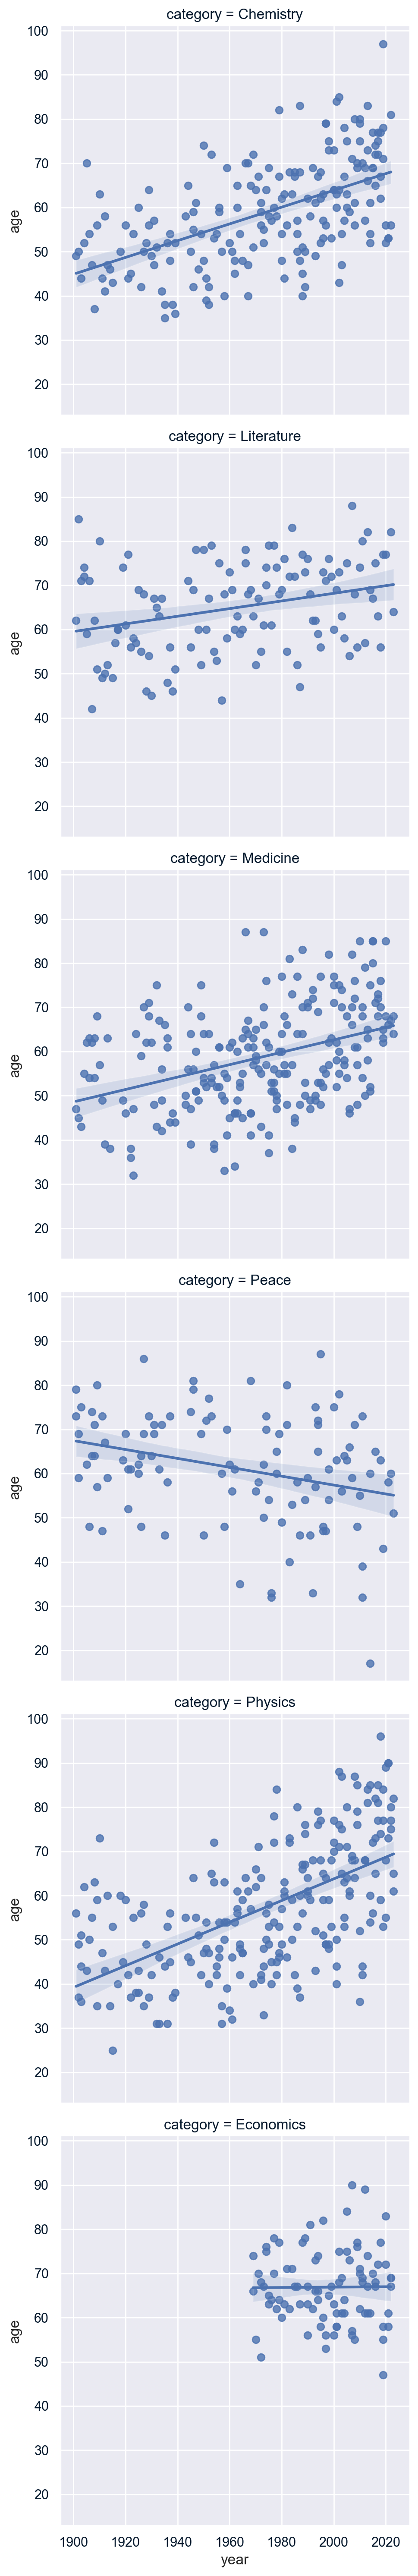

In [115]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x='year', y='age', data=nobel, row='category')

In [116]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1, 'age'))

# The youngest winner of a Nobel Prize as of 2016
nobel.nsmallest(1, 'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
942,2019,Chemistry,The Nobel Prize in Chemistry 2019,"""for the development of lithium-ion batteries""",1/3,976,Individual,John Goodenough,1922-07-25,Jena,Germany,Male,University of Texas,"Austin, TX",United States of America,2023-06-25,"Austin, TX",United States of America,False,2010,False,97.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0


In [117]:
# The name of the youngest winner of the Nobel Prize as of 2016
youngest_winner = 'Malala Yousafzai'